In [2]:
import os
import time
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms, datasets
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Subset
from torchvision.models import resnet18
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
# data_path_2 = '/content/drive/MyDrive/Dataset 2/Prostate Cancer'
# data_path_3 = '/content/drive/MyDrive/Dataset 3/Animal Faces'
data_path_1 = '/testData/Colorectal Cancer'
data_path_2 = '/testData/Prostate Cancer'
data_path_3 = '/testData/Animal Faces'
weights_path = '/best_model.pth'

In [ ]:
class ImageClassifier(nn.Module):
    def __init__(self, num_classes=3):
        super().__init__()
        self.resnet = resnet18(pretrained=False)
        num_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

# Load the CNN encoder (without classification head)
def get_encoder(weights_path, device):
    model = ImageClassifier(num_classes=3)
    model.load_state_dict(torch.load(weights_path, map_location=device))
    encoder = nn.Sequential(*list(model.resnet.children())[:-1])  # Remove classification layer
    return encoder.eval().to(device)

# Extract features for t-SNE
def extract_features(encoder, loader, device):
    features = []
    labels = []
    with torch.no_grad():
        for inputs, targets in loader:
            inputs = inputs.to(device)
            outputs = encoder(inputs)
            outputs = outputs.view(outputs.size(0), -1)  # Flatten features
            features.append(outputs.cpu().numpy())
            labels.append(targets.cpu().numpy())
    return np.vstack(features), np.hstack(labels)

# Apply t-SNE and visualize
def visualize_tsne(features, labels, class_names, title):
    tsne = TSNE(n_components=2, random_state=42)
    reduced_features = tsne.fit_transform(features)

    # Plot t-SNE results
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, ticks=range(len(class_names)), label='Class')
    plt.title(title)
    plt.xlabel('t-SNE Dim 1')
    plt.ylabel('t-SNE Dim 2')
    plt.show()

# Main function
def main(data_path, weights_path):
    # weights_path = "/content/drive/MyDrive/trained_model_parameters/best_model.pth"
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Preprocessing
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Load Dataset 2
    print()
    print("Loading new Dataset...")
    print()
    dataset = datasets.ImageFolder(root=data_path, transform=transform)
    loader = DataLoader(dataset, batch_size=32, shuffle=False)
    class_names = dataset.classes
    print(f"Class Names: {class_names}")

    # Load the fine-tuned encoder
    print()
    print("Loading fine-tuned encoder...")
    print()
    encoder = get_encoder(weights_path, device)

    # Extract features for Dataset 2
    print()
    print("Extracting features...")
    print()
    features, labels = extract_features(encoder, loader, device)
    print(f"Extracted {features.shape[0]} feature vectors of size {features.shape[1]}")

    # Visualize features with t-SNE
    print()
    print("Visualizing with t-SNE...")
    print()
    visualize_tsne(features, labels, class_names, "t-SNE Visualization: Fine-Tuned Encoder on Dataset 2")


Loading new Dataset...

Class Names: ['gland', 'nongland', 'tumor']

Loading fine-tuned encoder...



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-18-4cd08995e453>:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the function


Extracting features...

Extracted 6000 feature vectors of size 512

Visualizing with t-SNE...



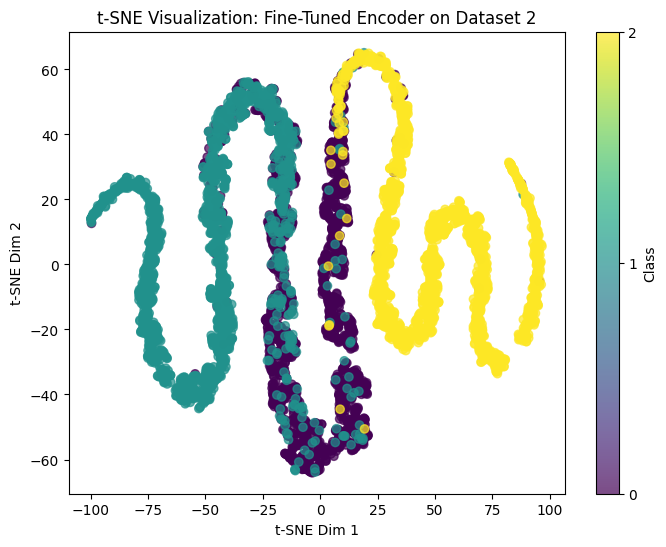

elapsed time: 112.84774565696716


In [ ]:
start_time = time.time()
main(data_path_2, weight_path)
end_time = time.time()
elapsed_time = end_time - start_time
print(f'elapsed time: {elapsed_time}')


Loading new Dataset...

Class Names: ['cat', 'dog', 'wild']

Loading fine-tuned encoder...



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-24-2973cae5fbf4>:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the function


Extracting features...

Extracted 6000 feature vectors of size 512

Visualizing with t-SNE...



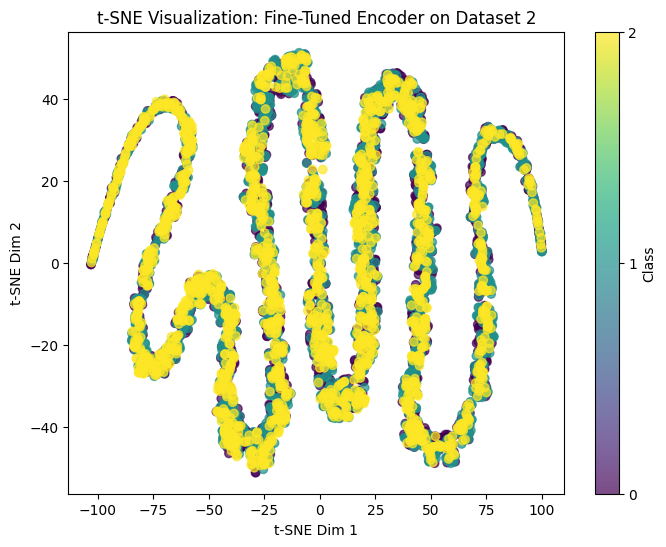

elapsed time: 942.8175868988037


In [ ]:
start_time = time.time()

main(data_path_3, weights_path)

end_time = time.time()
elapsed_time = end_time - start_time
print(f'elapsed time: {elapsed_time}')

In [ ]:
# Load the CNN encoder (without classification head) from ImageNet-pretrained model
def get_imagenet_encoder(device):
    model = resnet18(pretrained=True)  # Load ImageNet-pretrained model
    encoder = nn.Sequential(*list(model.children())[:-1])  # Remove classification layer
    return encoder.eval().to(device)

# Extract features for t-SNE
def extract_features(encoder, loader, device):
    features = []
    labels = []
    with torch.no_grad():
        for inputs, targets in loader:
            inputs = inputs.to(device)
            outputs = encoder(inputs)
            outputs = outputs.view(outputs.size(0), -1)  # Flatten features
            features.append(outputs.cpu().numpy())
            labels.append(targets.cpu().numpy())
    return np.vstack(features), np.hstack(labels)

# Apply t-SNE and visualize
def visualize_tsne(features, labels, class_names, title):
    tsne = TSNE(n_components=2, random_state=42)
    reduced_features = tsne.fit_transform(features)

    # Plot t-SNE results
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, ticks=range(len(class_names)), label='Class')
    plt.title(title)
    plt.xlabel('t-SNE Dim 1')
    plt.ylabel('t-SNE Dim 2')
    plt.show()

# Pre-trained main function
def main_pre(data_path):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Preprocessing
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Load dataset
    print("Loading Dataset...")
    dataset = datasets.ImageFolder(root=data_path, transform=transform)
    loader = DataLoader(dataset, batch_size=32, shuffle=False)
    class_names = dataset.classes
    print(f"Class Names: {class_names}")

    # Load the ImageNet-pretrained encoder
    print("Loading ImageNet-pretrained encoder...")
    encoder = get_imagenet_encoder(device)

    # Extract features
    print("Extracting features...")
    features, labels = extract_features(encoder, loader, device)
    print(f"Extracted {features.shape[0]} feature vectors of size {features.shape[1]}")

    # Visualize features with t-SNE
    print("Visualizing with t-SNE...")
    visualize_tsne(features, labels, class_names, "t-SNE Visualization: ImageNet-Pretrained Encoder on Dataset 3")

Loading Dataset...
Class Names: ['gland', 'nongland', 'tumor']
Loading ImageNet-pretrained encoder...


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 149MB/s]


Extracting features...
Extracted 6000 feature vectors of size 512
Visualizing with t-SNE...


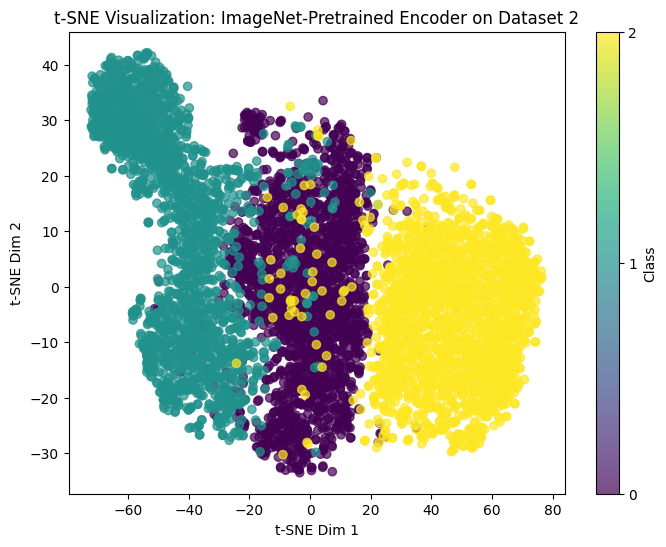

elapsed time: 133.4695954322815


In [ ]:
start_time = time.time()
main_pre(data_path)
end_time = time.time()
elapsed_time = end_time - start_time
print(f'elapsed time: {elapsed_time}')

Loading Dataset...
Class Names: ['cat', 'dog', 'wild']
Loading ImageNet-pretrained encoder...


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Extracting features...
Extracted 6000 feature vectors of size 512
Visualizing with t-SNE...


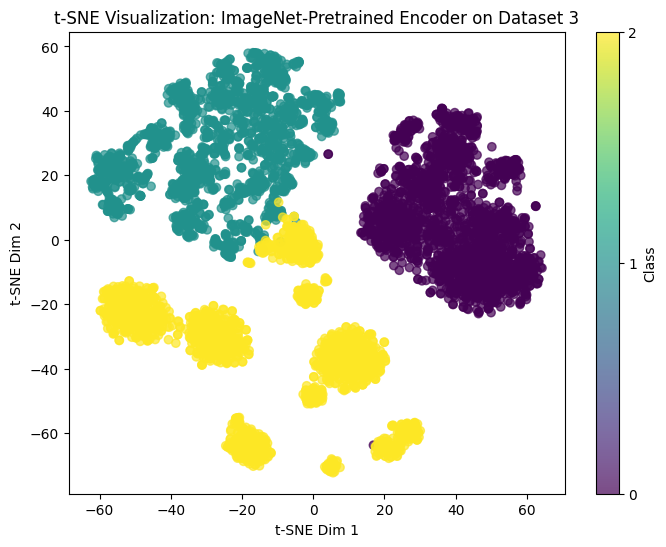

elapsed time: 124.95937752723694


In [ ]:
start_time = time.time()
main_pre(data_path_2)
end_time = time.time()
elapsed_time = end_time - start_time
print(f'elapsed time: {elapsed_time}')

In [8]:
# Load the CNN encoder (without classification head) from ImageNet-pretrained model
def get_encoder(weights_path=None, pretrained=True, device='cpu'):
    if weights_path:  # Fine-tuned encoder
        model = ImageClassifier(num_classes=3)
        model.load_state_dict(torch.load(weights_path, map_location=device))
        encoder = nn.Sequential(*list(model.resnet.children())[:-1])  # Remove classification layer
    else:  # ImageNet-pretrained encoder
        model = resnet18(pretrained=pretrained)
        encoder = nn.Sequential(*list(model.children())[:-1])  # Remove classification layer
    return encoder.eval().to(device)

# Extract features for ML classification
def extract_features(encoder, loader, device):
    features = []
    labels = []
    with torch.no_grad():
        for inputs, targets in loader:
            inputs = inputs.to(device)
            outputs = encoder(inputs)
            outputs = outputs.view(outputs.size(0), -1)  # Flatten features
            features.append(outputs.cpu().numpy())
            labels.append(targets.cpu().numpy())
    return np.vstack(features), np.hstack(labels)

# Train and evaluate a Logistic Regression classifier
def train_and_evaluate(features, labels, class_names, dataset_name):
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    # Train Logistic Regression
    classifier = LogisticRegression(max_iter=500, random_state=42)
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Evaluate results
    print(f"\nClassification Report for {dataset_name}:")
    print(classification_report(y_test, y_pred, target_names=class_names))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Classify function
def classify_pretrained(data_path):
    weights_path = None  # Change to `best_model.pth` for fine-tuned encoder
    use_fine_tuned = False  # Set to True for fine-tuned encoder
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Preprocessing
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Load dataset
    print("Loading Dataset...")
    dataset = datasets.ImageFolder(root=data_path, transform=transform)
    loader = DataLoader(dataset, batch_size=32, shuffle=False)
    class_names = dataset.classes
    print(f"Class Names: {class_names}")

    # Load encoder
    if use_fine_tuned:
        print("Loading fine-tuned encoder...")
        encoder = get_encoder(weights_path=weights_path, pretrained=False, device=device)
    else:
        print("Loading ImageNet-pretrained encoder...")
        encoder = get_encoder(weights_path=None, pretrained=True, device=device)

    # Extract features
    print("Extracting features...")
    features, labels = extract_features(encoder, loader, device)
    print(f"Extracted {features.shape[0]} feature vectors of size {features.shape[1]}")

    # Train and evaluate classifier
    print("Training and evaluating Logistic Regression classifier...")
    train_and_evaluate(features, labels, class_names, dataset_name="Dataset 3")

In [7]:
start_time = time.time()
classify_pretrained(data_path_2)
end_time = time.time()
elapsed_time = end_time - start_time
print(f'elapsed_time: {elapsed_time}')

Loading Dataset...
Class Names: ['gland', 'nongland', 'tumor']
Loading ImageNet-pretrained encoder...


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Extracting features...
Extracted 6000 feature vectors of size 512
Training and evaluating Logistic Regression classifier...

Classification Report for Dataset 2:
              precision    recall  f1-score   support

       gland       0.97      0.96      0.97       437
    nongland       0.97      0.97      0.97       380
       tumor       0.98      0.99      0.99       383

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200

Accuracy: 0.9733
elapsed_time: 3385.181788921356


In [9]:
start_time = time.time()
classify_pretrained(data_path_3)
end_time = time.time()
elapsed_time = end_time - start_time
print(f'elapsed_time: {elapsed_time}')

Loading Dataset...
Class Names: ['cat', 'dog', 'wild']
Loading ImageNet-pretrained encoder...


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Extracting features...
Extracted 6000 feature vectors of size 512
Training and evaluating Logistic Regression classifier...

Classification Report for Dataset 3:
              precision    recall  f1-score   support

         cat       1.00      1.00      1.00       437
         dog       0.99      1.00      0.99       380
        wild       1.00      0.99      0.99       383

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200

Accuracy: 0.9958
elapsed_time: 631.2809791564941
